C:\Users\Yuvasri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Without L1 - Loss: 0.3453, Accuracy: 0.8667
With L1    - Loss: 0.4352, Accuracy: 0.9000


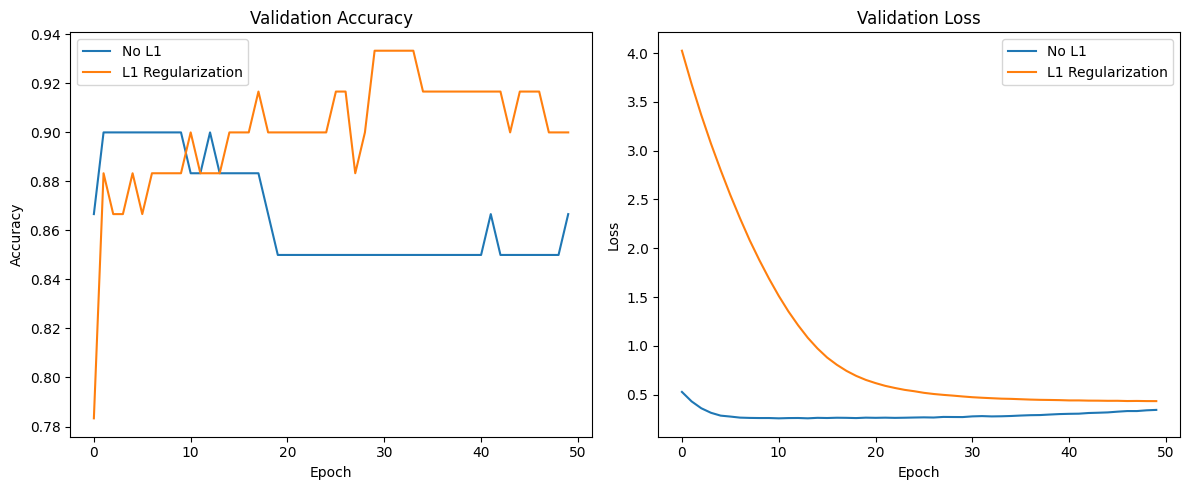

In [1]:
#3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("heart.csv")

# Convert object columns to numeric
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')
df.dropna(inplace=True)

# Binary classification: 0 = no disease, 1 = has disease
df['heartdisease'] = df['heartdisease'].apply(lambda x: 1 if x > 0 else 0)

# Features and labels
X = df.drop('heartdisease', axis=1)
y = df['heartdisease']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model without L1 regularization
model_no_l1 = Sequential([
    Dense(64, activation='relu', input_shape=(13,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_no_l1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history_no_l1 = model_no_l1.fit(X_train, y_train, epochs=50, batch_size=16,
                                validation_data=(X_test, y_test), verbose=0)

# Model with L1 regularization
model_l1 = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l1(0.01), input_shape=(13,)),
    Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(1, activation='sigmoid')
])
model_l1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history_l1 = model_l1.fit(X_train, y_train, epochs=50, batch_size=16,
                          validation_data=(X_test, y_test), verbose=0)

# Evaluation
loss_no_l1, acc_no_l1 = model_no_l1.evaluate(X_test, y_test, verbose=0)
loss_l1, acc_l1 = model_l1.evaluate(X_test, y_test, verbose=0)

print(f"Without L1 - Loss: {loss_no_l1:.4f}, Accuracy: {acc_no_l1:.4f}")
print(f"With L1    - Loss: {loss_l1:.4f}, Accuracy: {acc_l1:.4f}")

# Plotting performance
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history_no_l1.history['val_accuracy'], label='No L1')
plt.plot(history_l1.history['val_accuracy'], label='L1 Regularization')
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_no_l1.history['val_loss'], label='No L1')
plt.plot(history_l1.history['val_loss'], label='L1 Regularization')
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

